# Time Series forecasting using Deep learning
Placeholder: To write in the future. Deadline after deep learning module

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
data = pd.read_csv('hyderabad-us consulate-air-quality.csv', parse_dates=['date'])

In [2]:
data = data.sort_values('date')
data.columns = ['date', 'pm25']
data = data.reset_index()
data

,index,date,pm25
0,2295,2014-12-10,172
1,2296,2014-12-11,166
2,2297,2014-12-12,159
3,2298,2014-12-13,164
4,2299,2014-12-14,166
...,...,...,...
2309,0,2021-11-01,155
2310,1,2021-11-02,115
2311,2,2021-11-03,67
2312,3,2021-11-04,112


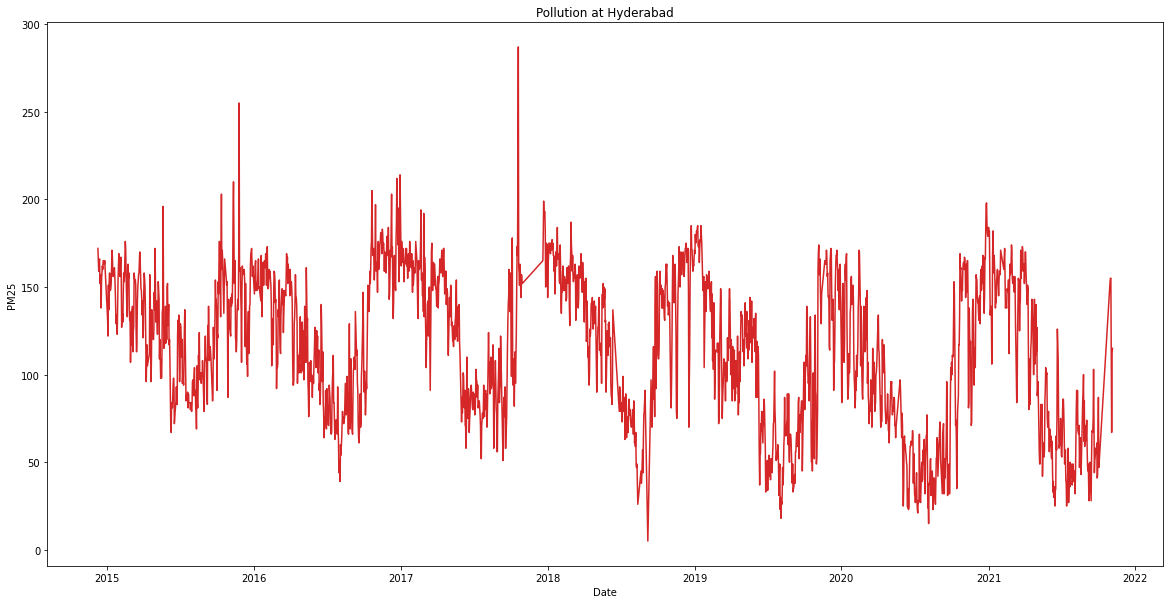

In [3]:
plt.figure(figsize=(20,10))
plt.plot(data.date, data.pm25, color='tab:red')
plt.gca().set(title='Pollution at Hyderabad', xlabel='Date', ylabel='PM25')
plt.show()

From this plot, we can see that pollution is higher during winter months while its lower during summer months. This effect is observed every year indicating a seasonal pattern in the data. There seems to be no increasing or decreasing trend in the data. This can be better visualised by decomposing the data into three components:  
1. Seasonal component: The component that varies with season  
2. Trend: Increasing or decreasing pattern  
3. Random component: Remaining component that has no pattern  

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data.pm25, model='additive', period = 365)

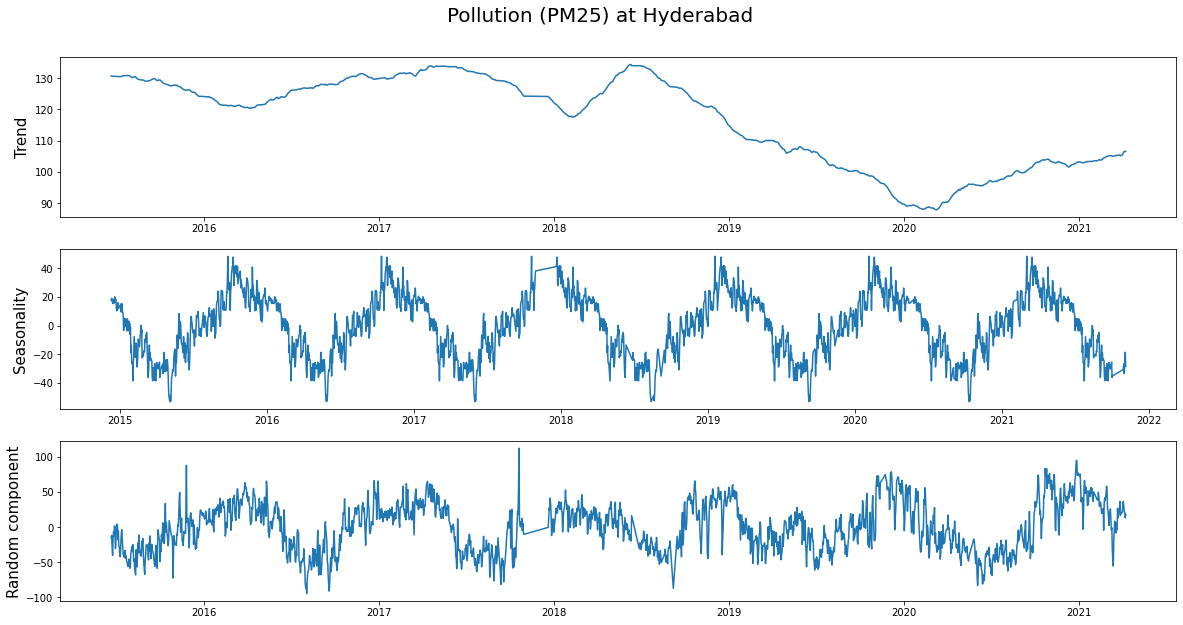

In [5]:
fs, axs = plt.subplots(3, figsize=(20,10))
plt.suptitle('Pollution (PM25) at Hyderabad', fontsize = 20, y = 0.95)

axs[0].plot(data.date, result.trend)
axs[1].plot(data.date, result.seasonal)
axs[2].plot(data.date, result.resid)

axs[0].set_ylabel('Trend', fontsize=15)
axs[1].set_ylabel('Seasonality', fontsize=15)
axs[2].set_ylabel('Random component', fontsize=15)

plt.show()

Looking at the trend, we can see how the pollution decreased during 2020 (probably due to covid) and is slowly rising as the country is getting back to its feet.

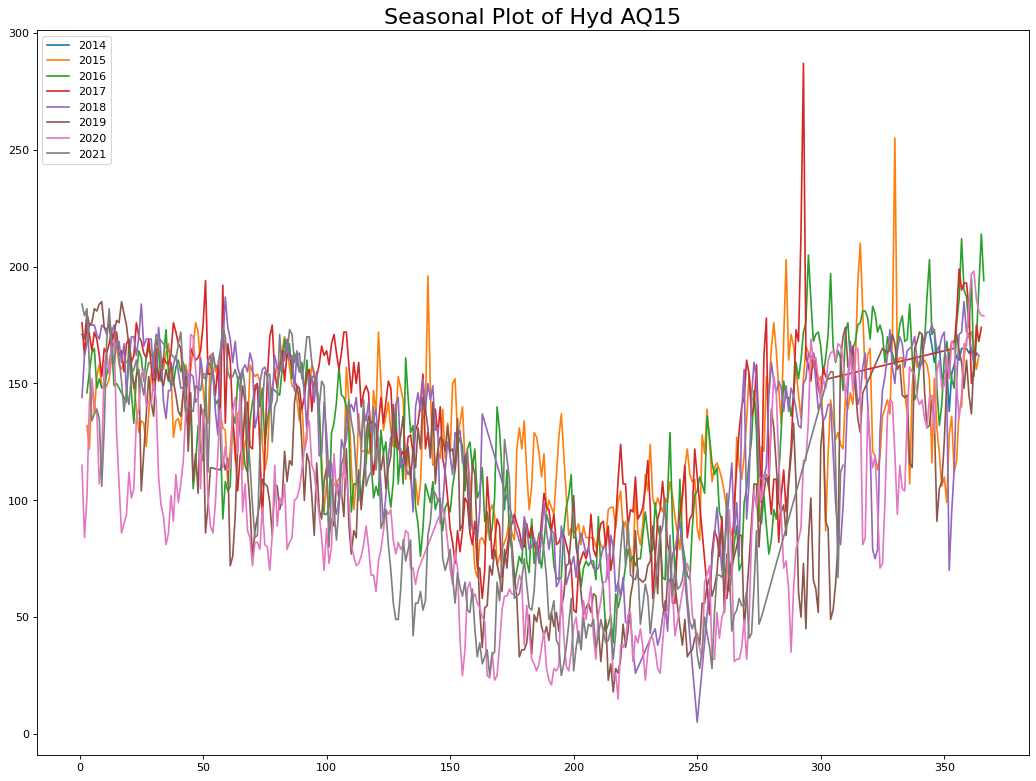

In [6]:
data['year'] = data.date.dt.year
data['day'] = data.date.dt.dayofyear

plt.figure(figsize=(16,12), dpi= 80)
for i, y in enumerate(data.year.unique()):
    plt.plot('day', 'pm25', data=data.loc[data.year==y, :], label = y)
plt.title("Seasonal Plot of Hyd AQ15", fontsize=20)
plt.legend(loc="upper left")

In [7]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Lambda, LSTM
import tensorflow as tf

In [8]:
dataset = tf.data.Dataset.range(20)
dataset = dataset.window(15, shift=1, drop_remainder=True)
dataset = dataset.flat_map(lambda window: window.batch(15))
dataset = dataset.map(lambda window: (window[:-1], window[-1:]))
dataset = dataset.shuffle(buffer_size=3)
dataset = dataset.batch(1).prefetch(1)
for x,y in dataset:
    print("x = ", x.numpy())
    print("y = ", y.numpy())

x =  [[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14]]
y =  [[15]]
x =  [[ 3  4  5  6  7  8  9 10 11 12 13 14 15 16]]
y =  [[17]]
x =  [[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15]]
y =  [[16]]
x =  [[ 5  6  7  8  9 10 11 12 13 14 15 16 17 18]]
y =  [[19]]
x =  [[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]]
y =  [[14]]
x =  [[ 4  5  6  7  8  9 10 11 12 13 14 15 16 17]]
y =  [[18]]


In [9]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
    dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
    dataset = dataset.batch(batch_size).prefetch(1)
    return dataset
dataset = windowed_dataset(data.pm25, 14, 1, 3)
for x,y in dataset:
    print("x = ", x.numpy())
    print("y = ", y.numpy())

x =  [[159 164 166 152 155 157 138 154 158 162 160 165 165 165]]
y =  [163]
x =  [[172 166 159 164 166 152 155 157 138 154 158 162 160 165]]
y =  [165]
x =  [[166 159 164 166 152 155 157 138 154 158 162 160 165 165]]
y =  [165]
x =  [[166 152 155 157 138 154 158 162 160 165 165 165 163 165]]
y =  [160]
x =  [[152 155 157 138 154 158 162 160 165 165 165 163 165 160]]
y =  [132]
x =  [[164 166 152 155 157 138 154 158 162 160 165 165 165 163]]
y =  [165]
x =  [[157 138 154 158 162 160 165 165 165 163 165 160 132 122]]
y =  [151]
x =  [[138 154 158 162 160 165 165 165 163 165 160 132 122 151]]
y =  [137]
x =  [[155 157 138 154 158 162 160 165 165 165 163 165 160 132]]
y =  [122]
x =  [[154 158 162 160 165 165 165 163 165 160 132 122 151 137]]
y =  [153]
x =  [[160 165 165 165 163 165 160 132 122 151 137 153 158 149]]
y =  [148]
x =  [[158 162 160 165 165 165 163 165 160 132 122 151 137 153]]
y =  [158]
x =  [[165 165 163 165 160 132 122 151 137 153 158 149 148 149]]
y =  [152]
x =  [[162 1

x =  [[ 88  83 128 120 139 125 108 114 116 113 109 103  96  85]]
y =  [90]
x =  [[139 125 108 114 116 113 109 103  96  85  90 127 115 109]]
y =  [119]
x =  [[128 120 139 125 108 114 116 113 109 103  96  85  90 127]]
y =  [115]
x =  [[108 114 116 113 109 103  96  85  90 127 115 109 119 134]]
y =  [154]
x =  [[125 108 114 116 113 109 103  96  85  90 127 115 109 119]]
y =  [134]
x =  [[116 113 109 103  96  85  90 127 115 109 119 134 154 143]]
y =  [143]
x =  [[113 109 103  96  85  90 127 115 109 119 134 154 143 143]]
y =  [138]
x =  [[120 139 125 108 114 116 113 109 103  96  85  90 127 115]]
y =  [109]
x =  [[103  96  85  90 127 115 109 119 134 154 143 143 138  91]]
y =  [123]
x =  [[ 96  85  90 127 115 109 119 134 154 143 143 138  91 123]]
y =  [121]
x =  [[ 85  90 127 115 109 119 134 154 143 143 138  91 123 121]]
y =  [153]
x =  [[ 90 127 115 109 119 134 154 143 143 138  91 123 121 153]]
y =  [146]
x =  [[114 116 113 109 103  96  85  90 127 115 109 119 134 154]]
y =  [143]
x =  [[127 11

y =  [96]
x =  [[102 130 120 125 105  97 108 139 107 122 107 161 144 129]]
y =  [132]
x =  [[107 122 107 161 144 129 132  97  90  76  88 107 103  99]]
y =  [108]
x =  [[161 144 129 132  97  90  76  88 107 103  99 108  96 100]]
y =  [99]
x =  [[129 132  97  90  76  88 107 103  99 108  96 100  99  87]]
y =  [97]
x =  [[144 129 132  97  90  76  88 107 103  99 108  96 100  99]]
y =  [87]
x =  [[107 161 144 129 132  97  90  76  88 107 103  99 108  96]]
y =  [100]
x =  [[132  97  90  76  88 107 103  99 108  96 100  99  87  97]]
y =  [99]
x =  [[ 90  76  88 107 103  99 108  96 100  99  87  97  99  95]]
y =  [106]
x =  [[ 88 107 103  99 108  96 100  99  87  97  99  95 106 113]]
y =  [123]
x =  [[ 97  90  76  88 107 103  99 108  96 100  99  87  97  99]]
y =  [95]
x =  [[103  99 108  96 100  99  87  97  99  95 106 113 123 127]]
y =  [123]
x =  [[ 76  88 107 103  99 108  96 100  99  87  97  99  95 106]]
y =  [113]
x =  [[ 99 108  96 100  99  87  97  99  95 106 113 123 127 123]]
y =  [104]
x =  [[

x =  [[194 176 162 176 171 164 172 169 162 153 165 163 167 172]]
y =  [166]
x =  [[192 214 194 176 162 176 171 164 172 169 162 153 165 163]]
y =  [167]
x =  [[214 194 176 162 176 171 164 172 169 162 153 165 163 167]]
y =  [172]
x =  [[162 176 171 164 172 169 162 153 165 163 167 172 166 172]]
y =  [162]
x =  [[176 162 176 171 164 172 169 162 153 165 163 167 172 166]]
y =  [172]
x =  [[164 172 169 162 153 165 163 167 172 166 172 162 164 155]]
y =  [167]
x =  [[171 164 172 169 162 153 165 163 167 172 166 172 162 164]]
y =  [155]
x =  [[172 169 162 153 165 163 167 172 166 172 162 164 155 167]]
y =  [169]
x =  [[169 162 153 165 163 167 172 166 172 162 164 155 167 169]]
y =  [159]
x =  [[153 165 163 167 172 166 172 162 164 155 167 169 159 162]]
y =  [176]
x =  [[176 171 164 172 169 162 153 165 163 167 172 166 172 162]]
y =  [164]
x =  [[165 163 167 172 166 172 162 164 155 167 169 159 162 176]]
y =  [170]
x =  [[163 167 172 166 172 162 164 155 167 169 159 162 176 170]]
y =  [168]
x =  [[172 1

x =  [[ 77  56  56  85  94 102 115  84  92  94 122  63  51  78]]
y =  [87]
x =  [[ 81  77  56  56  85  94 102 115  84  92  94 122  63  51]]
y =  [78]
x =  [[ 56  85  94 102 115  84  92  94 122  63  51  78  87  84]]
y =  [76]
x =  [[ 85  94 102 115  84  92  94 122  63  51  78  87  84  76]]
y =  [93]
x =  [[ 92  96 108  96  81  77  56  56  85  94 102 115  84  92]]
y =  [94]
x =  [[ 56  56  85  94 102 115  84  92  94 122  63  51  78  87]]
y =  [84]
x =  [[115  84  92  94 122  63  51  78  87  84  76  93  58  58]]
y =  [68]
x =  [[ 94 102 115  84  92  94 122  63  51  78  87  84  76  93]]
y =  [58]
x =  [[ 84  92  94 122  63  51  78  87  84  76  93  58  58  68]]
y =  [75]
x =  [[ 94 122  63  51  78  87  84  76  93  58  58  68  75  97]]
y =  [115]
x =  [[122  63  51  78  87  84  76  93  58  58  68  75  97 115]]
y =  [130]
x =  [[ 92  94 122  63  51  78  87  84  76  93  58  58  68  75]]
y =  [97]
x =  [[ 63  51  78  87  84  76  93  58  58  68  75  97 115 130]]
y =  [140]
x =  [[ 78  87  84  76

y =  [63]
x =  [[ 96 137  79  93  88  79  80  84  80  73  85  99  87  79]]
y =  [87]
x =  [[137  79  93  88  79  80  84  80  73  85  99  87  79  87]]
y =  [86]
x =  [[79 80 84 80 73 85 99 87 79 87 86 63 65 89]]
y =  [82]
x =  [[88 79 80 84 80 73 85 99 87 79 87 86 63 65]]
y =  [89]
x =  [[93 88 79 80 84 80 73 85 99 87 79 87 86 63]]
y =  [65]
x =  [[80 73 85 99 87 79 87 86 63 65 89 82 64 68]]
y =  [72]
x =  [[84 80 73 85 99 87 79 87 86 63 65 89 82 64]]
y =  [68]
x =  [[73 85 99 87 79 87 86 63 65 89 82 64 68 72]]
y =  [76]
x =  [[85 99 87 79 87 86 63 65 89 82 64 68 72 76]]
y =  [67]
x =  [[99 87 79 87 86 63 65 89 82 64 68 72 76 67]]
y =  [81]
x =  [[79 87 86 63 65 89 82 64 68 72 76 67 81 86]]
y =  [82]
x =  [[87 86 63 65 89 82 64 68 72 76 67 81 86 82]]
y =  [77]
x =  [[87 79 87 86 63 65 89 82 64 68 72 76 67 81]]
y =  [86]
x =  [[86 63 65 89 82 64 68 72 76 67 81 86 82 77]]
y =  [80]
x =  [[65 89 82 64 68 72 76 67 81 86 82 77 80 74]]
y =  [71]
x =  [[80 84 80 73 85 99 87 79 87 86 63 65 89 8

y =  [100]
x =  [[100 121 108 117 115 142 149 142 124 100 120 116 102  85]]
y =  [116]
x =  [[ 96 100 121 108 117 115 142 149 142 124 100 120 116 102]]
y =  [85]
x =  [[108 117 115 142 149 142 124 100 120 116 102  85 116  96]]
y =  [92]
x =  [[117 115 142 149 142 124 100 120 116 102  85 116  96  92]]
y =  [108]
x =  [[115 142 149 142 124 100 120 116 102  85 116  96  92 108]]
y =  [114]
x =  [[ 99 109 107 106  99  85 107 106  96 100 121 108 117 115]]
y =  [142]
x =  [[121 108 117 115 142 149 142 124 100 120 116 102  85 116]]
y =  [96]
x =  [[149 142 124 100 120 116 102  85 116  96  92 108 114  85]]
y =  [92]
x =  [[142 149 142 124 100 120 116 102  85 116  96  92 108 114]]
y =  [85]
x =  [[142 124 100 120 116 102  85 116  96  92 108 114  85  92]]
y =  [89]
x =  [[120 116 102  85 116  96  92 108 114  85  92  89 108 101]]
y =  [104]
x =  [[116 102  85 116  96  92 108 114  85  92  89 108 101 104]]
y =  [93]
x =  [[100 120 116 102  85 116  96  92 108 114  85  92  89 108]]
y =  [101]
x =  [[1

x =  [[131 132 143 134  91 105 108 125 151 161 168 168 171 164]]
y =  [159]
x =  [[ 91 105 108 125 151 161 168 168 171 164 159 148 160 145]]
y =  [137]
x =  [[108 125 151 161 168 168 171 164 159 148 160 145 137 160]]
y =  [163]
x =  [[105 108 125 151 161 168 168 171 164 159 148 160 145 137]]
y =  [160]
x =  [[134  91 105 108 125 151 161 168 168 171 164 159 148 160]]
y =  [145]
x =  [[161 168 168 171 164 159 148 160 145 137 160 163 115  84]]
y =  [101]
x =  [[125 151 161 168 168 171 164 159 148 160 145 137 160 163]]
y =  [115]
x =  [[168 171 164 159 148 160 145 137 160 163 115  84 101 142]]
y =  [152]
x =  [[171 164 159 148 160 145 137 160 163 115  84 101 142 152]]
y =  [141]
x =  [[151 161 168 168 171 164 159 148 160 145 137 160 163 115]]
y =  [84]
x =  [[164 159 148 160 145 137 160 163 115  84 101 142 152 141]]
y =  [138]
x =  [[159 148 160 145 137 160 163 115  84 101 142 152 141 138]]
y =  [107]
x =  [[168 168 171 164 159 148 160 145 137 160 163 115  84 101]]
y =  [142]
x =  [[160 14

x =  [[28 26 52 53 64 61 42 73 69 51 32 65 68 72]]
y =  [32]
x =  [[52 53 64 61 42 73 69 51 32 65 68 72 32 32]]
y =  [52]
x =  [[64 61 42 73 69 51 32 65 68 72 32 32 52 41]]
y =  [50]
x =  [[53 64 61 42 73 69 51 32 65 68 72 32 32 52]]
y =  [41]
x =  [[26 52 53 64 61 42 73 69 51 32 65 68 72 32]]
y =  [32]
x =  [[42 73 69 51 32 65 68 72 32 32 52 41 50 53]]
y =  [66]
x =  [[69 51 32 65 68 72 32 32 52 41 50 53 66 96]]
y =  [74]
x =  [[51 32 65 68 72 32 32 52 41 50 53 66 96 74]]
y =  [31]
x =  [[61 42 73 69 51 32 65 68 72 32 32 52 41 50]]
y =  [53]
x =  [[73 69 51 32 65 68 72 32 32 52 41 50 53 66]]
y =  [96]
x =  [[68 72 32 32 52 41 50 53 66 96 74 31 32 32]]
y =  [37]
x =  [[32 65 68 72 32 32 52 41 50 53 66 96 74 31]]
y =  [32]
x =  [[72 32 32 52 41 50 53 66 96 74 31 32 32 37]]
y =  [49]
x =  [[32 32 52 41 50 53 66 96 74 31 32 32 37 49]]
y =  [32]
x =  [[52 41 50 53 66 96 74 31 32 32 37 49 32 49]]
y =  [85]
x =  [[41 50 53 66 96 74 31 32 32 37 49 32 49 85]]
y =  [104]
x =  [[ 50  53  66  96 

x =  [[69 63 59 65 53 52 62 45 33 39 30 33 36 25]]
y =  [34]
x =  [[59 65 53 52 62 45 33 39 30 33 36 25 34 35]]
y =  [65]
x =  [[52 62 45 33 39 30 33 36 25 34 35 65 57 75]]
y =  [126]
x =  [[ 45  33  39  30  33  36  25  34  35  65  57  75 126 118]]
y =  [109]
x =  [[ 33  39  30  33  36  25  34  35  65  57  75 126 118 109]]
y =  [77]
x =  [[ 62  45  33  39  30  33  36  25  34  35  65  57  75 126]]
y =  [118]
x =  [[ 30  33  36  25  34  35  65  57  75 126 118 109  77  58]]
y =  [59]
x =  [[ 33  36  25  34  35  65  57  75 126 118 109  77  58  59]]
y =  [60]
x =  [[ 25  34  35  65  57  75 126 118 109  77  58  59  60  66]]
y =  [75]
x =  [[ 36  25  34  35  65  57  75 126 118 109  77  58  59  60]]
y =  [66]
x =  [[ 34  35  65  57  75 126 118 109  77  58  59  60  66  75]]
y =  [64]
x =  [[ 35  65  57  75 126 118 109  77  58  59  60  66  75  64]]
y =  [54]
x =  [[ 57  75 126 118 109  77  58  59  60  66  75  64  54  53]]
y =  [61]
x =  [[ 65  57  75 126 118 109  77  58  59  60  66  75  64  54]]

In [10]:
split_time = 2314-365*2
time_train = data.date[:split_time]
x_train = data.pm25[:split_time]
time_valid = data.date[split_time:]
x_valid = data.pm25[split_time:]

In [14]:
window_size = 14
batch_size = 1
shuffle_buffer_size = 2314-365*2

dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
l0 = tf.keras.layers.Dense(1, input_shape=[window_size])
model = tf.keras.models.Sequential([l0])

model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(learning_rate=1e-6, momentum=0.9), metrics=["mae"])

model.fit(dataset,epochs=100)

print("Layer weights {}".format(l0.get_weights()))

Epoch 1/100
1570/1570 [==============================] - 2s 764us/step - loss: 2513.6338 - mae: 36.4270
Epoch 2/100
1570/1570 [==============================] - 2s 1ms/step - loss: 2627.8843 - mae: 38.2651
Epoch 3/100
1570/1570 [==============================] - 1s 625us/step - loss: 4424.3721 - mae: 48.4370
Epoch 4/100
1570/1570 [==============================] - 1s 623us/step - loss: 5549.5840 - mae: 53.6082
Epoch 5/100
1570/1570 [==============================] - 1s 637us/step - loss: 2992.0337 - mae: 40.5288
Epoch 6/100
1570/1570 [==============================] - 1s 846us/step - loss: 3471.9915 - mae: 44.3860
Epoch 7/100
1570/1570 [==============================] - 3s 2ms/step - loss: 2531.1494 - mae: 34.7863
Epoch 8/100
1570/1570 [==============================] - 2s 1ms/step - loss: 1852.7971 - mae: 32.0643
Epoch 9/100
1570/1570 [==============================] - 1s 661us/step - loss: 1253.9712 - mae: 26.1902
Epoch 10/100
1570/1570 [==============================] - 1s 618us/ste

In [15]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

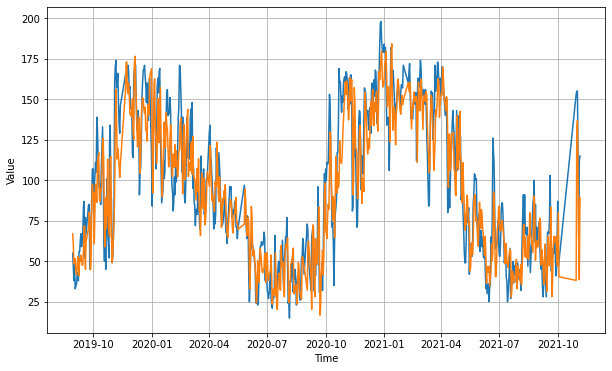

In [17]:
forecast = []

for time in range(len(data.pm25) - window_size):
    forecast.append(model.predict(np.array(data.pm25[time:time + window_size])[np.newaxis]))

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, results)

In [18]:
tf.keras.metrics.mean_absolute_error(x_valid, results).numpy()

15.45758

This model is currently deployed in Azure
## Deep neural network

In [22]:
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)


model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(14, input_shape=[window_size], activation="relu"), 
    tf.keras.layers.Dense(14, activation="relu"), 
    tf.keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(learning_rate=1e-6, momentum=0.9), metrics=["mae"])
model.fit(dataset,epochs=100)


Epoch 1/100
1570/1570 [==============================] - 1s 730us/step - loss: 845.5267 - mae: 21.9859
Epoch 2/100
1570/1570 [==============================] - 1s 724us/step - loss: 1019.4009 - mae: 24.1638
Epoch 3/100
1570/1570 [==============================] - 1s 717us/step - loss: 722.2228 - mae: 20.5732
Epoch 4/100
1570/1570 [==============================] - 1s 718us/step - loss: 701.0610 - mae: 20.4133
Epoch 5/100
1570/1570 [==============================] - 1s 716us/step - loss: 677.8721 - mae: 19.7713
Epoch 6/100
1570/1570 [==============================] - 1s 689us/step - loss: 897.4562 - mae: 22.3025
Epoch 7/100
1570/1570 [==============================] - 1s 698us/step - loss: 739.0591 - mae: 20.7214
Epoch 8/100
1570/1570 [==============================] - 1s 688us/step - loss: 659.6113 - mae: 19.5167
Epoch 9/100
1570/1570 [==============================] - 1s 749us/step - loss: 774.5299 - mae: 21.2334
Epoch 10/100
1570/1570 [==============================] - 1s 725us/step 

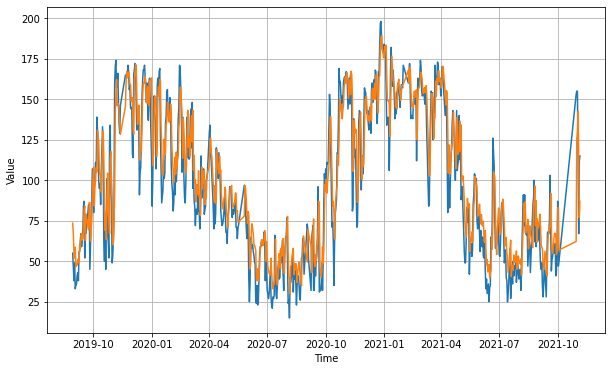

In [23]:
forecast = []

for time in range(len(data.pm25) - window_size):
    forecast.append(model.predict(np.array(data.pm25[time:time + window_size])[np.newaxis]))

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, results)

In [24]:
tf.keras.metrics.mean_absolute_error(x_valid, results).numpy()

13.240775

In [26]:
model.save('pm25_DL_model')

INFO:tensorflow:Assets written to: pm25_DL_model\assets


In [28]:
model = tf.keras.models.load_model('pm25_DL_model')

In [29]:
model.predict(np.array(data.pm25[1:15])[np.newaxis])

array([[163.71252]], dtype=float32)

This model is currently deployed as "Deep learning model" in Git actions
## RNN

In [30]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),
  tf.keras.layers.SimpleRNN(14, return_sequences=True),
  tf.keras.layers.SimpleRNN(14, return_sequences=True),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 200.0)
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-8, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set, epochs=25, callbacks=[lr_schedule])

Epoch 1/25
1570/1570 [==============================] - 7s 3ms/step - loss: 255.5130 - mae: 256.0130
Epoch 2/25
1570/1570 [==============================] - 6s 3ms/step - loss: 136.1440 - mae: 136.6439
Epoch 3/25
1570/1570 [==============================] - 5s 3ms/step - loss: 44.4807 - mae: 44.9783
Epoch 4/25
1570/1570 [==============================] - 5s 3ms/step - loss: 36.5102 - mae: 37.0077
Epoch 5/25
1570/1570 [==============================] - 5s 3ms/step - loss: 36.1142 - mae: 36.6120
Epoch 6/25
1570/1570 [==============================] - 5s 3ms/step - loss: 35.6905 - mae: 36.1887
Epoch 7/25
1570/1570 [==============================] - 5s 3ms/step - loss: 35.2254 - mae: 35.7231
Epoch 8/25
1570/1570 [==============================] - 5s 3ms/step - loss: 34.7579 - mae: 35.2558
Epoch 9/25
1570/1570 [==============================] - 5s 3ms/step - loss: 34.1971 - mae: 34.6951
Epoch 10/25
1570/1570 [==============================] - 5s 3ms/step - loss: 33.6498 - mae: 34.1480
Epoch

(1e-08, 1e-06, 20.0, 300.0)

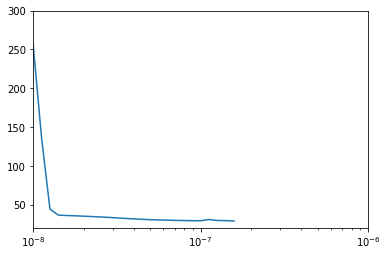

In [31]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-8, 1e-6, 20, 300])

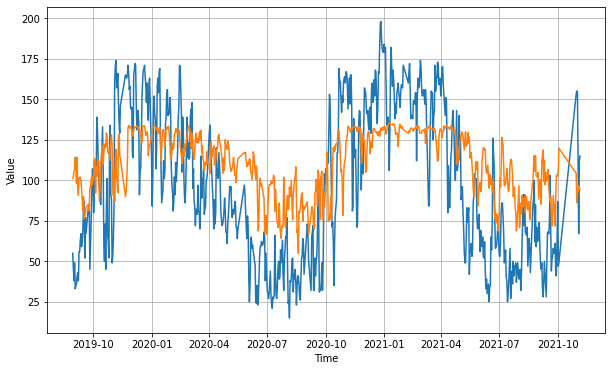

In [32]:
forecast = []

for time in range(len(data.pm25) - window_size):
    forecast.append(model.predict(np.array(data.pm25[time:time + window_size])[np.newaxis]))

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, results)

In [33]:
tf.keras.metrics.mean_absolute_error(x_valid, results).numpy()

array([39.826717, 39.908363, 40.442093, 40.639812, 42.359173, 40.856907,
       39.519268, 42.359173, 39.365696, 39.280582, 39.826717, 39.908363,
       39.908363, 39.68518 , 39.340984, 39.333275, 39.928116, 39.28711 ,
       40.759506, 40.39    , 40.219036, 39.60482 , 39.452724, 39.928116,
       39.365696, 39.365696, 39.68518 , 39.991554, 39.472366, 39.68518 ,
       40.163906, 41.764423, 42.12229 , 39.29519 , 40.96939 , 39.991554,
       41.883602, 41.883602, 39.362793, 39.472366, 40.639812, 42.59794 ,
       44.496548, 44.496548, 41.306187, 43.33026 , 44.037125, 44.929745,
       44.26953 , 47.320896, 46.74483 , 43.56934 , 43.088158, 43.449894,
       41.883602, 44.496548, 45.72595 , 46.895237, 44.496548, 39.572132,
       39.280582, 40.54024 , 39.362793, 41.649178, 43.803654, 39.908363,
       39.627377, 39.29519 , 46.088104, 46.969337, 42.59794 , 42.24059 ,
       39.28711 , 39.30741 , 39.753284, 41.42014 , 48.52433 , 48.957085,
       49.10847 , 48.377632, 48.47638 , 48.792995, 

<Figure size 432x288 with 0 Axes>

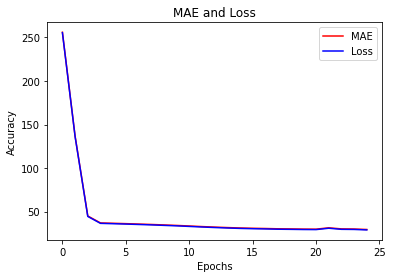

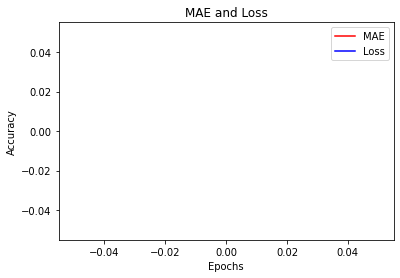

<Figure size 432x288 with 0 Axes>

In [34]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
mae=history.history['mae']
loss=history.history['loss']

epochs=range(len(loss)) # Get number of epochs

#------------------------------------------------
# Plot MAE and Loss
#------------------------------------------------
plt.plot(epochs, mae, 'r')
plt.plot(epochs, loss, 'b')
plt.title('MAE and Loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["MAE", "Loss"])

plt.figure()

epochs_zoom = epochs[200:]
mae_zoom = mae[200:]
loss_zoom = loss[200:]

#------------------------------------------------
# Plot Zoomed MAE and Loss
#------------------------------------------------
plt.plot(epochs_zoom, mae_zoom, 'r')
plt.plot(epochs_zoom, loss_zoom, 'b')
plt.title('MAE and Loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["MAE", "Loss"])

plt.figure()

LSTM

In [35]:
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

In [36]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

x_train_LSTM = tf.expand_dims(x_train, axis=-1)

train_set = windowed_dataset(x_train_LSTM, window_size, batch_size, shuffle_buffer_size)
train_set

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 200)
])
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-8, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set, epochs=25, callbacks=[lr_schedule])

Epoch 1/25
1570/1570 [==============================] - 27s 12ms/step - loss: 51.0839 - mae: 51.5817
Epoch 2/25
1570/1570 [==============================] - 21s 13ms/step - loss: 30.5634 - mae: 31.0600 0s - loss: 30.5700 - mae: 31.06
Epoch 3/25
1570/1570 [==============================] - 20s 13ms/step - loss: 28.5261 - mae: 29.0220
Epoch 4/25
1570/1570 [==============================] - 23s 14ms/step - loss: 27.1795 - mae: 27.6754
Epoch 5/25
1570/1570 [==============================] - 21s 13ms/step - loss: 25.9100 - mae: 26.4058
Epoch 6/25
1570/1570 [==============================] - 21s 13ms/step - loss: 24.7144 - mae: 25.2104
Epoch 7/25
1570/1570 [==============================] - 22s 14ms/step - loss: 23.5953 - mae: 24.0904
Epoch 8/25
1570/1570 [==============================] - 21s 13ms/step - loss: 22.6447 - mae: 23.1403
Epoch 9/25
1570/1570 [==============================] - 22s 14ms/step - loss: 21.7317 - mae: 22.2269
Epoch 10/25
1570/1570 [==============================] - 22

In [37]:
rnn_forecast = model_forecast(model, np.array(data.pm25)[..., np.newaxis], window_size)
rnn_forecast = rnn_forecast[split_time - window_size:-1, -1, 0]

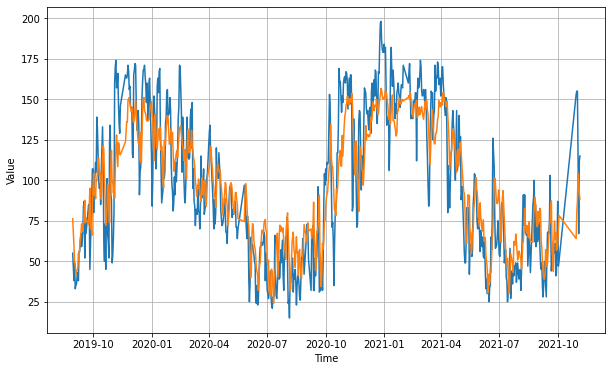

In [38]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, rnn_forecast)

In [39]:
tf.keras.metrics.mean_absolute_error(x_valid, rnn_forecast).numpy()

17.472342

<Figure size 432x288 with 0 Axes>

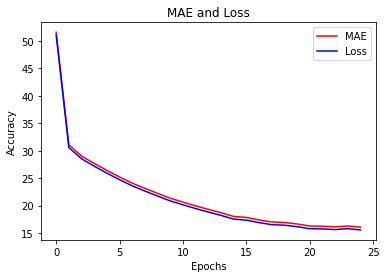

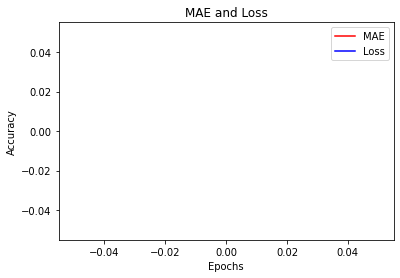

<Figure size 432x288 with 0 Axes>

In [40]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
mae=history.history['mae']
loss=history.history['loss']

epochs=range(len(loss)) # Get number of epochs

#------------------------------------------------
# Plot MAE and Loss
#------------------------------------------------
plt.plot(epochs, mae, 'r')
plt.plot(epochs, loss, 'b')
plt.title('MAE and Loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["MAE", "Loss"])

plt.figure()

epochs_zoom = epochs[200:]
mae_zoom = mae[200:]
loss_zoom = loss[200:]

#------------------------------------------------
# Plot Zoomed MAE and Loss
#------------------------------------------------
plt.plot(epochs_zoom, mae_zoom, 'r')
plt.plot(epochs_zoom, loss_zoom, 'b')
plt.title('MAE and Loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["MAE", "Loss"])

plt.figure()